# 1 Reading Dataset

In [1]:
#import library and read dataset
import pandas as pd
df_reviews = pd.read_csv('IMDB Dataset.csv')
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
#take a sample of 10000 rows to make processing faster and get imbalance data
#9000 positives
df_positive = df_reviews[df_reviews['sentiment']=='positive'][:9000]
#1000 positives
df_negative = df_reviews[df_reviews['sentiment']=='negative'][:1000]


In [3]:
df_reviews_imbalanced = pd.concat([df_positive, df_negative])

In [4]:
df_reviews_imbalanced

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [5]:
df_reviews_imbalanced.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# 2 Dealing with Imbalanced classes

<Axes: xlabel='sentiment'>

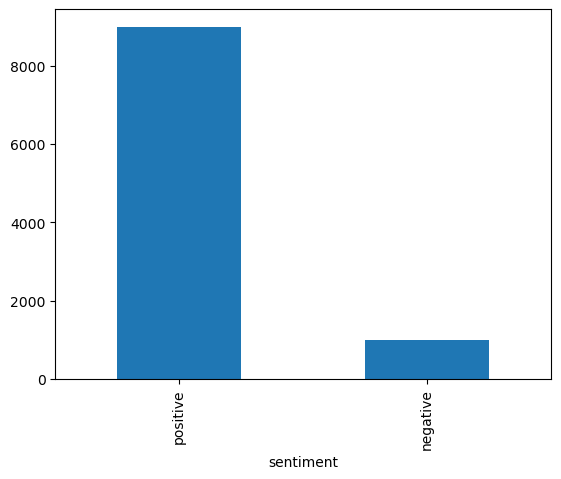

In [6]:
#make a barplot to show how data is distributed
df_reviews_imbalanced.value_counts('sentiment').plot(kind='bar')

## 2.1 balancing Data with .sample()

In [9]:
length_negative = len(df_reviews_imbalanced[df_reviews_imbalanced['sentiment']=='negative'])

In [10]:
length_negative

1000

In [12]:
df_reviews_positive = df_reviews_imbalanced[df_reviews_imbalanced['sentiment']=='positive'].sample(n=length_negative)

In [13]:
df_reviews_negative = df_reviews_imbalanced[df_reviews_imbalanced['sentiment']=='negative']

In [15]:
df_reviews_balanced = pd.concat([df_reviews_positive, df_reviews_negative])

In [17]:
df_reviews_balanced.reset_index(drop=True, inplace=True)

In [18]:
df_reviews_balanced

,review,sentiment
0,This is sad this movie is the tops this should...,positive
1,"In this episode, Locke and Eko go searching fo...",positive
2,Does anyone know what kind of pickup John T dr...,positive
3,No other movie has made me feel like this befo...,positive
4,Set in and near a poor working class town in t...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


## 2.2 Balancing data with RandomUnderSampler

In [22]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

df_reviews_balanced, df_reviews_balanced['sentiment'] = rus.fit_resample(df_reviews_imbalanced[['review']], df_reviews_imbalanced['sentiment'])


In [23]:
df_reviews_balanced

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
10833,Knute Rockne led an extraordinary life and his...,positive
1039,At the height of the 'Celebrity Big Brother' r...,positive
5255,This is another of Robert Altman's underrated ...,positive
12237,This movie won a special award at Cannes for i...,positive


# 3 Splitting data into train and test

In [29]:
#import train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_reviews_balanced, test_size=0.33, random_state=42)

In [26]:
#create train and test dataframe

In [31]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [78]:
train_x

1824     If you want to see a movie about two utterly u...
411      While in a plane, flicking through the large c...
901      it got switched off before the opening credits...
11429    Trapped: buried alive brings us to a resort th...
8355     Boris and Bela do well together in this film,w...
                               ...                        
10644    I saw the movie in Izmir as the closing film o...
16133    This is a great documentary and above comments...
1739     Obviously, the comments above that fawn over t...
2443     Robert Carlyle excels again. The period was ca...
1467     A convict serving time comes forward to give t...
Name: review, Length: 1967, dtype: object

# 4 Text Representation(bag of Words)

## 4.1 Count Vectorizer

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code.",
        "I hate writing code in JAVA. I hate JAVA code."]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

In [59]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names_out())

In [60]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


## 4.2 TF-IDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love writing code in Python. I love Python code.",
        "I hate writing code in JAVA. I hate JAVA code."]

In [75]:
df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])

In [76]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'], columns=tfidf.get_feature_names_out())

In [77]:
df_tfidf

,code,hate,java,love,python,writing
review,,,,,,
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# 5 Turning our text data into numerical vectors

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [87]:
test_x_vector = tfidf.transform(test_x)

In [88]:
test_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2652 stored elements and shape (33, 24806)>

In [85]:
train_x_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1967, 24806))

In [86]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01,01pm,02,04,06,08,10,...,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,être,ísnt,île,ïn,ünfaithful
1824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11429,0,0,0,0,0,0,0,0,0,0.045901,...,0,0,0,0,0,0,0,0,0,0
8355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6 Model Selection

## 6.1 Support Vector Machine(SVM)

In [89]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [93]:
svc.predict(tfidf.transform(['good movie']))

array(['positive'], dtype=object)

## 6.2 Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 6.3 Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

,priors,None
,var_smoothing,1e-09


# 6.4 Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# 7 Model Evaluation

## 7.1 Confusion Matrix

In [112]:
#calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, svc.predict(test_x_vector), labels=['positive', 'negative'])

array([[12,  3],
       [ 5, 13]])

## 7.2 Mean Accuracy

In [116]:
#calculate accuracy of of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

#model.score(test_x_vector, test_y)

0.7575757575757576
0.6060606060606061
0.6060606060606061
0.7878787878787878


## 7.3 F1 Score

In [117]:
from sklearn.metrics import f1_score

In [120]:
f1_score(test_y, svc.predict(test_x_vector), labels=['positive', 'negative'], average=None)

array([0.75      , 0.76470588])

## 7.4 Classification Report

In [124]:
from sklearn.metrics import classification_report
print(classification_report(test_y, svc.predict(test_x_vector), labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.71      0.80      0.75        15
    negative       0.81      0.72      0.76        18

    accuracy                           0.76        33
   macro avg       0.76      0.76      0.76        33
weighted avg       0.76      0.76      0.76        33



# 8 Tuning the Model

## 8.1 GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1, 4, 8, 16, 32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters,cv=5)
svc_grid.fit(train_x_vector, train_y)

In [ ]:
svc_grid.best_estimator_